In [7]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import push_notebook, show, output_notebook; 
from bokeh.plotting import figure; 
from bokeh.layouts import gridplot
output_notebook()


%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Loading BokehJS ...

In [9]:
Qc = np.array([0, 3, 5, 6, 6.5, 6.7],dtype=float)
n=Qc.shape[0]
Ql = np.linspace(0,n-1,num=n,)
print (Qc)
print (n)


def polyloop(x,y,k): #polynomials go from 0th to kth degree
    plist=[]; p=figure()
    for i in range(k):
        poly_i=np.polyfit(x,y,i+1) #estimate the polynomial
        y_i=np.polyval(poly_i,x) #predict using the estimated polynomial
        x_range=p.x_range; y_range=p.y_range #link the plot axes
        p=figure(title='degree {}'.format(i+1),x_range=p.x_range, y_range=p.y_range, plot_width=200, plot_height=200)
        p.circle(x,y, color='blue', size=9, alpha=.4)
        p.line(x, y_i, color='red', line_width=5, alpha=.6)
        plist.append(p)
    show(gridplot(plist[0:k],ncols=int(np.ceil(k**0.5))))#display the graphs
polyloop(Ql,Qc,4)


[0.  3.  5.  6.  6.5 6.7]
6


[0.  3.  5.  6.  6.5 6.7]
6


<function matplotlib.pyplot.show(*args, **kw)>

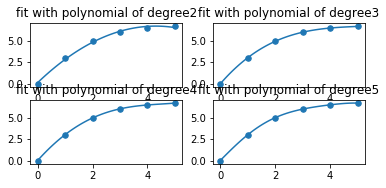

In [2]:
Qc = np.array([0, 3, 5, 6, 6.5, 6.7],dtype=float)
n=Qc.shape[0]
Ql = np.linspace(0,n-1,num=n,)
print (Qc)
print (n)


for i in range(4):
    #print(i)
    j=i+2
    c= np.polynomial.polynomial.polyfit(Ql,Qc,j)
    #print (np.linspace(0,n-1,num=10*n))
    xfit=np.linspace(0,n-1,num=10*n)
    fitf=np.polynomial.polynomial.polyval(xfit,c)
    plt.subplot(3,2,i+1)
    plt.scatter(Ql,Qc,s=30)
    plt.plot(xfit,fitf)
    plt.title('fit with polynomial of degree'+str(j))  
plt.show


5.303273669950263
4.979710031613373
5.035669253743041
5.005185108779428


<function matplotlib.pyplot.show(*args, **kw)>

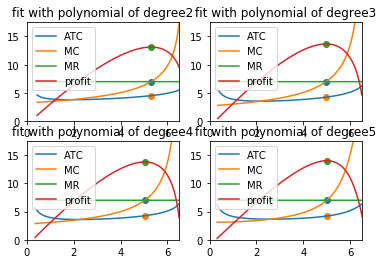

In [3]:
rent=1
wage=10
price=7
gap=400
for i in np.arange(4):
    #print(i)
    j=i+2
    c= np.polynomial.polynomial.polyfit(Ql,Qc,j)
    #print (np.linspace(0,n-1,num=10*n))
    Qlfit=np.linspace(0.1,n-1,num=gap*n)
    Qcfit=np.polynomial.polynomial.polyval(Qlfit,c)
    TCost=np.add(rent,np.multiply(Qlfit,wage))
    TR=np.multiply(price,Qcfit)
    profit=TR-TCost
    MC=np.divide(np.diff(TCost),np.diff(Qcfit))
    MR=np.divide(np.diff(TR),np.diff(Qcfit))
    ATC=np.divide(TCost,Qcfit)
    AFC=np.divide(rent,Qcfit)
    AVC=np.subtract(ATC,AFC)
    maxi1=np.argmax(profit)
    Qcfitx=Qcfit[maxi1]
    Qlfitx=Qlfit[maxi1]
    maxi2=np.argmin(np.square(np.subtract(MR,MC)))
    print(Qcfitx)
    
    
    plt.subplot(2,2,i+1)
    plt.plot(Qcfit,ATC, label='ATC')
    plt.plot(Qcfit[:-1],MC, label='MC')
    plt.plot(Qcfit[:-1],MR, label='MR')
    
    plt.scatter(Qcfitx,MR[maxi1])
    plt.scatter(Qcfitx,ATC[maxi1])
    plt.legend()
    plt.xlim(0,6.5)
    plt.ylim(0,2.5*price)
    plt.title('fit with polynomial of degree'+str(j))
    
   
    plt.plot(Qcfit,profit, label='profit')
    plt.scatter(Qcfitx,profit[maxi1])
    plt.xlim(0,6.5)
    plt.legend()
   
  
plt.show
